In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
% matplotlib notebook

# Business understanding 
The Swiss Federal Railway company gives at disposal lots of open source data. We will dig in one of the dataset of public transport status and try to see if we can extract delay information about it and other statistics.

Can we find out what is the most frequented station in Switzerland ? And the one with most delays ? 
What is a typical delay ? Are long delays frequent ? 

# Data understanding
User should download a csv prior to running this notebook.
The csv files are found at following adress :https://opentransportdata.swiss/dataset/istdaten
They are updated every day and have following naming convention : 
 - 2019-08-22istdaten.csv
 - 2019-08-23istdaten.csv 
 - ...
 
The csv file contain data about all the stops of all public transport of Switzerland for a given date.
This is the first trial to read and understand what the data looks like for one particular day, and extract usefull information to get delays of every transport.

In [2]:
# Read raw file
data_raw = pd.read_csv('Data/2019-08-22istdaten.csv', sep=';')

/Users/Christouf/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Take a look at all columns and understand their meaning
data_raw.columns

Index(['BETRIEBSTAG', 'FAHRT_BEZEICHNER', 'BETREIBER_ID', 'BETREIBER_ABK',
       'BETREIBER_NAME', 'PRODUKT_ID', 'LINIEN_ID', 'LINIEN_TEXT', 'UMLAUF_ID',
       'VERKEHRSMITTEL_TEXT', 'ZUSATZFAHRT_TF', 'FAELLT_AUS_TF', 'BPUIC',
       'HALTESTELLEN_NAME', 'ANKUNFTSZEIT', 'AN_PROGNOSE',
       'AN_PROGNOSE_STATUS', 'ABFAHRTSZEIT', 'AB_PROGNOSE',
       'AB_PROGNOSE_STATUS', 'DURCHFAHRT_TF'],
      dtype='object')

In [4]:
# Keep columns that add value
data_all = data_raw[['BETRIEBSTAG', # operation day
 'BETREIBER_ABK', # operator name
 'PRODUKT_ID', # product
 'LINIEN_TEXT', # type of transport line
 'UMLAUF_ID', 
 'VERKEHRSMITTEL_TEXT', # type of transportation
 'ZUSATZFAHRT_TF',
 'FAELLT_AUS_TF', # canceled
 'HALTESTELLEN_NAME', # train station name
 'ANKUNFTSZEIT', # arrival time
 'AN_PROGNOSE', # arrival time forecasted
 'AN_PROGNOSE_STATUS',# arrival time forecasted status
 'ABFAHRTSZEIT', # departure time
 'AB_PROGNOSE', # departure time forecasted
 'AB_PROGNOSE_STATUS', # departure time forecasted status
]]

In [5]:
# Look at data integrity and size
data_all.count()

BETRIEBSTAG            1674093
BETREIBER_ABK          1674093
PRODUKT_ID             1651417
LINIEN_TEXT            1674093
UMLAUF_ID               987735
VERKEHRSMITTEL_TEXT    1171879
ZUSATZFAHRT_TF         1674093
FAELLT_AUS_TF          1674093
HALTESTELLEN_NAME      1654722
ANKUNFTSZEIT           1572579
AN_PROGNOSE            1548332
AN_PROGNOSE_STATUS     1674093
ABFAHRTSZEIT           1573931
AB_PROGNOSE            1549673
AB_PROGNOSE_STATUS     1674093
dtype: int64

In [6]:
# Produkt_ID seems to be containing information about the type of public transport
data_all['PRODUKT_ID'].value_counts()

Bus       1052094
Tram       228596
BUS        208119
Zug        157854
Metro        4301
Schiff        453
Name: PRODUKT_ID, dtype: int64

In [7]:
def plot_value_counts_pie_chart(df_col, title_upperpart):
    """
    function takes a column of a dataframe as input and makes a pie chart out of it,
    based on the value_counts function. title_upperpart is also provided to give the 
    plto a title
    """
    plt.figure()
    df_size = len(df_col)
    df_col.value_counts().plot(kind='pie',y = df_col.value_counts().values, legend=False, 
                                           autopct='%1.1f%%',startangle=90, shadow=False, label='',
                                           title=title_upperpart+', \n total: ' +str(df_size)+' stops (22th August 2019)')

<IPython.core.display.Javascript object>


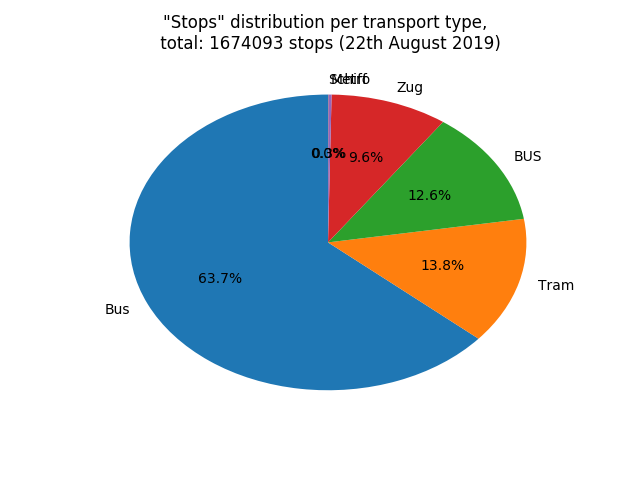

In [8]:
plot_value_counts_pie_chart(data_all['PRODUKT_ID'], '"Stops" distribution per transport type')

In [9]:
# Keep only trains data (Zug is train in german)
data_train = data_all[data_all['PRODUKT_ID']=='Zug']

<IPython.core.display.Javascript object>


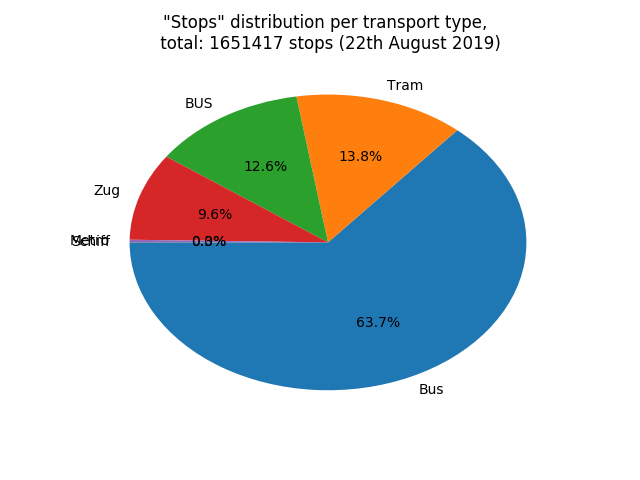

In [10]:
plt.figure()
total = sum(data_all['PRODUKT_ID'].value_counts())
#data_all['PRODUKT_ID'].value_counts().plot(kind='pie', legend=True)
data_all['PRODUKT_ID'].value_counts().plot(kind='pie',y = data_all['PRODUKT_ID'].value_counts().values, legend=False, 
                                           autopct='%1.1f%%',startangle=180, shadow=False, label='',
                                           title='"Stops" distribution per transport type, \n total: ' +str(total)+' stops (22th August 2019)')
# Keep only train information
data = data_all[data_all['PRODUKT_ID']=='Zug']

<IPython.core.display.Javascript object>


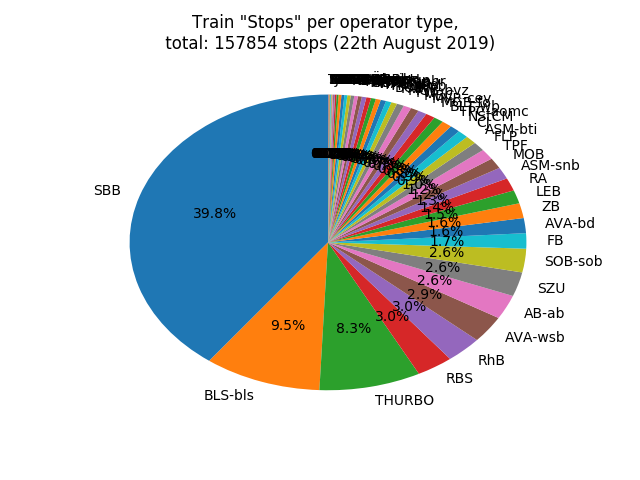

In [11]:
plot_value_counts_pie_chart(data_train['BETREIBER_ABK'], 'Train "Stops" per operator type')

In [12]:
# Keep only trains operated by SBB
data_train_SBB = data_train[data_train['BETREIBER_ABK']=='SBB']

<IPython.core.display.Javascript object>


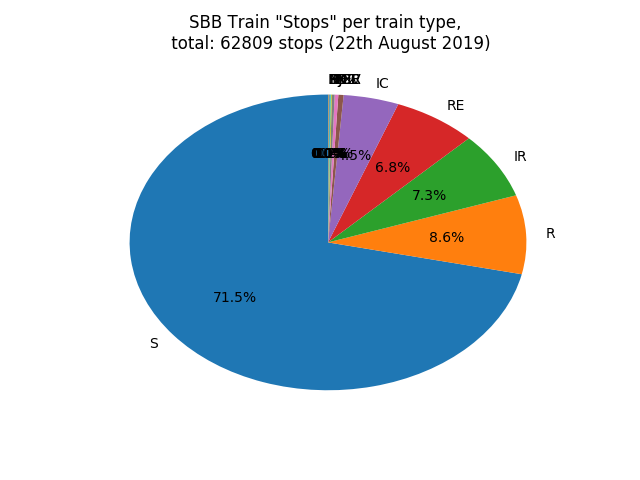

In [13]:
plot_value_counts_pie_chart(data_train_SBB['VERKEHRSMITTEL_TEXT'], 'SBB Train "Stops" per train type')

In [14]:
# Keep only lonmg-distance SBB trains IC, RE and IR
data_train_SBB_ld = data_train_SBB[data_train_SBB['VERKEHRSMITTEL_TEXT'].isin(['IC','RE','IR'])]

In [15]:
# Take a look at the data, to understand its size
data_train_SBB_ld.describe()

,BETRIEBSTAG,BETREIBER_ABK,PRODUKT_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS
count,11671,11671,11671,11671,0.0,11671,11671,11671,11671,10209,9967,11671,10213,9970,11671
unique,1,1,1,25,0.0,3,2,2,199,1255,9298,3,1251,9278,3
top,22.08.2019,SBB,Zug,RE,NaN,IR,False,False,Zürich HB,22.08.2019 17:27,22.08.2019 08:33:47,REAL,22.08.2019 21:00,22.08.2019 14:50:00,REAL
freq,11671,11671,11671,4273,NaN,4568,11497,11546,712,20,4,9573,22,4,9607


# Data modeling
Extra feature has to be created from the information at disposal : delay of trains. For now saved as a datetime.timedelta

In [16]:
# Create delay at arrival and departure (DELAY_ and DELAY_AB) column - which is what we need for our analysis
data_train_SBB_ld['DELAY_AN'] = pd.to_datetime(data_train_SBB_ld['AN_PROGNOSE'],format="%d.%m.%Y %H:%M:%S") - pd.to_datetime(data_train_SBB_ld['ANKUNFTSZEIT'],format="%d.%m.%Y %H:%M")
data_train_SBB_ld['DELAY_AB'] = pd.to_datetime(data_train_SBB_ld['AB_PROGNOSE'],format="%d.%m.%Y %H:%M:%S") - pd.to_datetime(data_train_SBB_ld['ABFAHRTSZEIT'],format="%d.%m.%Y %H:%M")

/Users/Christouf/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Christouf/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [17]:
# Check what the new columns looks like. We have timedelta, also sometimes negative. 
# This will have to be transformed to seconds in a later stage
data_train_SBB_ld['DELAY_AB'].describe()

count                      9970
mean     0 days 00:01:57.452457
std      0 days 00:02:31.439084
min           -1 days +23:58:27
25%             0 days 00:00:52
50%             0 days 00:01:19
75%             0 days 00:02:20
max             0 days 02:19:51
Name: DELAY_AB, dtype: object

In [18]:
print(len(data_raw))
print(len(data_train_SBB_ld))

1674093
11671


# Conclusion on data preparation
We have looked into the data for a single, and could reduce the size of entries from 1.6 millions, to 11 thousands. We've also added the delay columns to our data. There is no additional change to be made to the data.

Now that this process has been effectuated for one csv file, we can repeat for 365 days with the python function preprocess_data.py